In [11]:
#I am going to find Meal option prediction in the Airplane data using Logistic Regression Model
#I will use the cleaned data from the AirlinecuratedData.csv

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap
from sklearn import metrics
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings;
warnings.filterwarnings('ignore');

df=pd.read_csv('AirlinecuratedData.csv')

#Adding new column IsMealAvailable (0/1)

df['IsMealIncluded'] = df['Additional_Info'].apply(lambda x: apply_meal_status(x))
print(df['IsMealIncluded'].value_counts())
print(df['Additional_Info'].value_counts())

1    8701
0    1982
Name: IsMealIncluded, dtype: int64
Null                            8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
Null                               1
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


In [16]:
#Defining dependent and independent variables

Y=df['IsMealIncluded']

X = df[['Date_of_Journey_Timestamp','Departure_Hour','Departure_Minute',
        'Arrival_Hour','Arrival_Minute','Duration_en','Additional_Info_en',
            'Airline_Air Asia',
                 'Airline_Air India', 'Airline_GoAir',
                 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers',
                 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara',
                 'Airline_Vistara Premium economy', 'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
                 'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
                 'Destination_Kolkata', 'Destination_New Delhi','Total_Stops_1 stop','Total_Stops_2 stops',
                 'Total_Stops_3 stops','Total_Stops_4 stops','Total_Stops_non-stop'  ]]

reg = LogisticRegression(fit_intercept=True)

#Train Test Split
X_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=1/3,random_state=32)

reg.fit(X_train, y_train)

standard_Scaler=StandardScaler()
X_train = standard_Scaler.fit_transform(X_train)
x_test = standard_Scaler.transform(x_test)
y_pred = reg.predict(x_test)

# Printing the Ismealavailable predicted values
print(y_pred)

[1 1 1 ... 0 1 0]


# Fitting Logistic regression

In [8]:
#Implementing Logistic Regression using sklearn
modelLogistic = LogisticRegression()
modelLogistic.fit(X_train,y_train)


y_pred= modelLogistic.predict(x_test)
print(y_pred)


# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred)

# Calculate precision
precision_lr = precision_score(y_test, y_pred)

print("Logistic Regression Scores:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)

#print the regression coefficients

print("The intercept b0= ", modelLogistic.intercept_)

print("The coefficient b1= ", modelLogistic.coef_)





[1 0 1 ... 1 1 0]
Logistic Regression Scores:
Accuracy: 0.9988767200224656
Precision: 1.0
The intercept b0=  [10.04880685]
The coefficient b1=  [[-1.29782900e-01  6.34494684e-02  3.62322533e-03  3.25430125e-02
   2.31547500e-02 -1.09768137e-01  3.21070897e+00  5.38645329e-03
   4.92008209e+00  3.85809593e-03  1.47773920e-02 -4.05099568e+00
   1.74705184e-01 -2.17175879e+00  9.15918756e-04  2.96414531e+00
   2.30689464e-04  6.37679727e-03  4.13726428e-04  1.20428198e-01
   4.20280163e-03 -8.10219498e-02 -3.06556899e-02  1.90764146e-02
  -3.06556899e-02 -8.10219498e-02 -1.15424478e-01  1.90764146e-02
   4.20280163e-03  3.07328989e-01 -2.34632108e-02  1.90641054e-01
   9.22674985e-02  0.00000000e+00 -1.30274638e-01]]


In [4]:
def apply_meal_status(m):
    if 'meal' in m:
        return 0
    else:
        return 1

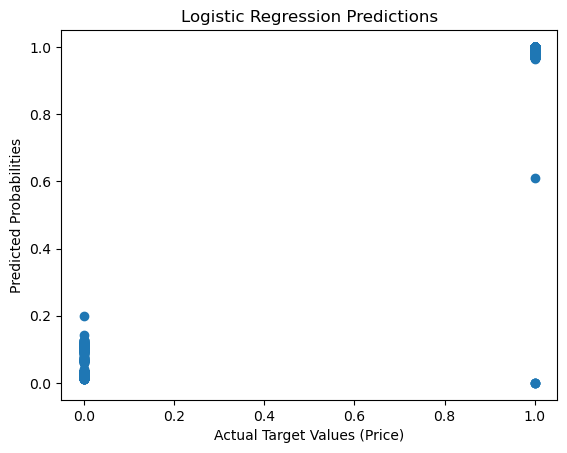

In [17]:
#Predicting chart

import matplotlib.pyplot as plt

predicted_probabilities = modelLogistic.predict_proba(x_test)[:, 1]  # Extract probabilities of the positive class (1)

# Plot predicted probabilities against actual target values
plt.scatter(y_test, predicted_probabilities)
plt.xlabel('Actual Target Values (Price)')
plt.ylabel('Predicted Probabilities')
plt.title('Logistic Regression Predictions')
plt.show()


# Clustering

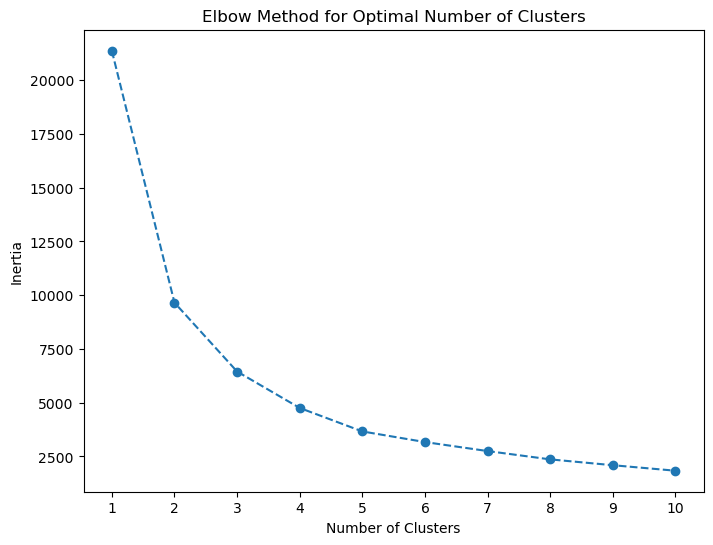

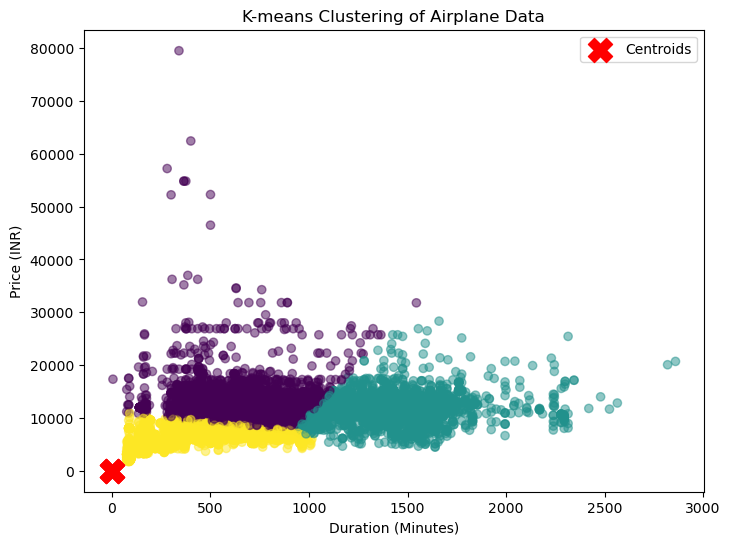

In [3]:
#using the Duration and Price to demonstrate K-means clustering

cdata = df[['Duration_en','Price']]
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cdata)

# Determine the optimal number of clusters using the elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(1, 11))
plt.show()

# Based on the elbow curve, let's choose 3 clusters
n_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the DataFrame
cdata['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(cdata['Duration_en'], cdata['Price'], c=cdata['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Price (INR)')
plt.title('K-means Clustering of Airplane Data')
plt.legend()
plt.show()